In [22]:
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [23]:
def fixDFcolsForR(myDF):
    for i in range(myDF.shape[1]): # for each col
        if myDF.iloc[:, i].dtype == 'O': # check if col is type object
            myDF.iloc[:, i] = myDF.iloc[:, i].astype(str) # if yes set type to string
    return myDF

In [24]:
import pandas as pd
df = pd.read_csv('Collisions.csv')
df['COLLISION_SEVERITY'].value_counts()
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [25]:
df = fixDFcolsForR(df)

In [26]:
df.head()
df.TYPE_OF_COLLISION.head()

0    C
1    C
2    C
3    B
4    C
Name: TYPE_OF_COLLISION, dtype: object

In [27]:
%R -i df

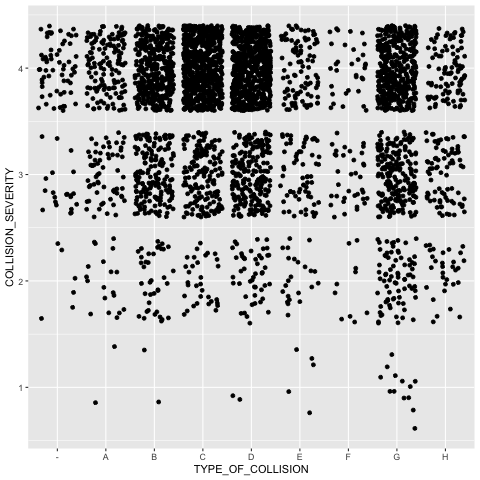

In [28]:
%%R

ggplot() +
geom_point(aes(x = TYPE_OF_COLLISION, y = COLLISION_SEVERITY), data = df, position = "jitter")

# more accidents that are less severe: type of colliosions B, C, D, G were most least severe

In [29]:
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,90736476,2018,2018-05-29,9335,2018-05-18,755,022037,nan,5,1,...,0,0,-,-,37.73747,-122.40784,SAN FRANCISCO,SAN FRANCISCO,-122.407801,37.737483
1,90736282,2018,2018-05-29,9335,2018-05-17,1215,022007,nan,4,1,...,0,0,-,-,37.73841,-122.40775,SAN FRANCISCO,SAN FRANCISCO,NaN,NaN
2,90735985,2018,2018-05-29,9335,2018-05-28,1045,018845,nan,1,1,...,0,0,-,-,37.78522,-122.39317,SAN FRANCISCO,SAN FRANCISCO,-122.393170,37.785220
3,90735917,2018,2018-05-29,9335,2018-05-17,1035,022096,nan,4,1,...,0,0,-,-,37.72752,-122.40259,SAN FRANCISCO,SAN FRANCISCO,-122.402545,37.727537
4,90735464,2018,2018-05-28,9335,2018-05-22,1723,018688,nan,2,2,...,0,0,-,-,37.80830,-122.36712,SAN FRANCISCO,SAN FRANCISCO,-122.367035,37.808211
